In [46]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
import os

with open('../API_KEY', 'r') as f:
    os.environ['OPENAI_API_KEY'] = f.read()

## Load code and split on each function


In [40]:
from igor_funciton_loading import parse_igor_file, IgorFile
from IPython.display import Markdown, display

filename = "IgorAcq_test/fastdac.ipf"
igor_file = parse_igor_file(filename, verbose=False)

In [36]:
display(Markdown(igor_file.functions[10].to_markdown(include_code=False)))

## Summary

- **Name**: RampMultipleFDAC
- **Declaration**: RampMultipleFDAC(InstrID,channels,setpoint,[ramprate,setpoints_str,ignore_lims])
- **Start_line**: 343
- **End_line**: 373
- **Filename**: IgorAcq_test/fastdac.ipf
## Docstring

```
Ramps multiple channels to setpoint(s) (this is the ramp function that SHOULD be used)
InstrID - FastDAC connection variable (e.g. fd)
channels - comma separated list of channels to sweep
setpoint - Value to sweep channels to (ignored if using setpoints_str)
ramprate - sweeprate of channels to setpoint mV/s
setpoints_str - comma separated list of setpoints for each channel in channels (setpoint ignored)
Note: If ramprate is left default, then each channel will ramp at speed specified in FastDAC window
```


In [35]:
# from dataclasses import dataclass, asdict
# from typing import List
# from IPython.display import Markdown, display
# from langchain.schema import Document





functions = extract_functions(filename)
print(f'Collected len(functions) functions')

display(Markdown(functions[0].to_markdown()))

Ignoring: ï»¿#pragma TextEncoding = "UTF-8"

Ignoring: #pragma rtGlobals=3		// Use modern global access method and strict wave access.

Ignoring: 

Ignoring: // Fast DAC (8 DAC channels + 4 ADC channels). Build in-house by Mark (Electronic work shop).

Ignoring: // This is the instrument specific .ipf for FastDACs. For interface integration into IgorAqc see ScanController_FastDAC.ipf

Ignoring: // Note: the Fast DAC is generally "stand alone", no other instruments can read at the same time (unless taking point by point measurements with fastdac, in which case you should be using a DMM)

Ignoring: //		Open a connection to the FastDAC FIRST, and then InitFastDAC() from ScanController_FastDAC

Ignoring: // 		The fastdac will only run with the scancontroller_fastdac window specifically (not the regular scancontroller windowm, except for point by point measurements)

Ignoring: // 	   In order to save fastdac waves with Scancontroller the user must add the fastdac=1 flag to initWaves() and S

## Summary

- **Name**: openFastDACconnection
- **Start_line**: 24
- **End_line**: 60
- **Filename**: IgorAcq_test/fastdac.ipf
- **Docstring**: instrID is the name of the global variable that will be used for communication visa_address is the VISA address string, i.e. ASRL1::INSTR Most FastDAC communication relies on the info in "sc_fdackeys". Pass numDACCh and numADCCh to fill info into "sc_fdackeys" fill info into "sc_fdackeys"
## Docstring

```
instrID is the name of the global variable that will be used for communication visa_address is the VISA address string, i.e. ASRL1::INSTR Most FastDAC communication relies on the info in "sc_fdackeys". Pass numDACCh and numADCCh to fill info into "sc_fdackeys" fill info into "sc_fdackeys"
```
## Code

```igor
function openFastDACconnection(instrID, visa_address, [verbose,numDACCh,numADCCh,master, optical])
	// instrID is the name of the global variable that will be used for communication
	// visa_address is the VISA address string, i.e. ASRL1::INSTR
	// Most FastDAC communication relies on the info in "sc_fdackeys". Pass numDACCh and
	// numADCCh to fill info into "sc_fdackeys"
	string instrID, visa_address
	variable verbose, numDACCh, numADCCh, master
	variable optical  // Whether connected by optical (or usb)

	master = paramisDefault(master) ? 0 : master
	optical = paramisDefault(optical) ? 1 : optical
	verbose = paramisDefault(verbose) ? 1 : verbose
		
	variable localRM
	variable status = viOpenDefaultRM(localRM) // open local copy of resource manager
	if(status < 0)
		VISAerrormsg("open FastDAC connection:", localRM, status)
		abort
	endif
	
	string comm = ""
	sprintf comm, "name=FastDAC,instrID=%s,visa_address=%s" instrID, visa_address
	string options
	if(optical)
 		options = "baudrate=1750000,databits=8,parity=0,test_query=*IDN?"  // For Optical
	else
		options = "baudrate=57600,databits=8,parity=0,test_query=*IDN?"  // For USB
	endif
	openVISAinstr(comm, options=options, localRM=localRM, verbose=verbose)
	
	// fill info into "sc_fdackeys"
	if(!paramisdefault(numDACCh) && !paramisdefault(numADCCh))
		scf_addFDinfos(instrID,visa_address,numDACCh,numADCCh,master=master)
	endif
	
	return localRM

```


In [ ]:
for 
all_functions = 

## Check the length of the functions

In [19]:
import tiktoken
tiktoken.encoding_for_model('gpt-3.5-turbo')
encoder = tiktoken.get_encoding('cl100k_base')
print(f'Encoder should be: {encoder}')

def token_len(text: str):
    encoder = tiktoken.get_encoding('cl100k_base')
    return len(encoder.encode(text))

Encoder should be: <Encoding 'cl100k_base'>


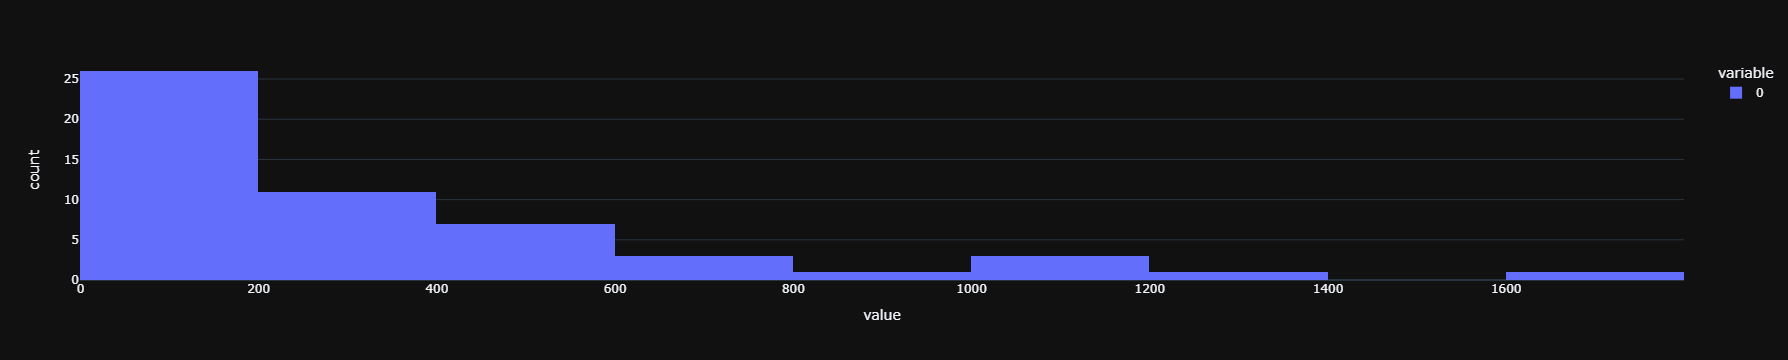

In [24]:
import plotly.express as px
px.histogram([token_len(func) for func in functions], nbins=10,template='plotly_dark')

In [62]:
text_splitter = RecursiveCharacterTextSplitter(
    
    # chunk_size=200,
    # chunk_overlap=40,
    chunk_size=3000,
    chunk_overlap=20,
    length_function=len_tokens,

)

In [63]:
texts = text_splitter.create_documents(texts=[docs[0].page_content])
len(texts)
for text in texts[:30]:
    print(len_tokens(text.page_content))

1124
2838
1241
2609
2886
2987
2571
2244
2824
2972
2636
2804
2452
2401
2483
2587
2483
2360
2210
167


In [71]:
docs[0].metadata
for text in texts[:20]:
    print(text.page_content[:100])
    print('---')
    print(text.page_content[-100:])
    print('\n\n---\n\n')

z
	3D Graphics
Igor can create various kinds of 3D graphics including:
	Surface Plots
	3D Scatter Pl
---
 This depends on your graphics hardware, graphics driver version and graphics acceleration settings.


---


Gizmo Guided Tour
The tutorials in the following sections will give you a sense of Gizmo's basic cap
---
 revisit the tour later and is not strictly necessary.
Gizmo 3D Scatter Plot and Fitted Surface Tour


---


Gizmo 3D Scatter Plot and Fitted Surface Tour
In this tour we will create a 3D scatter plot from a t
---
on Tour.pxp".
This is just in case you want to revisit the tour later and is not strictly necessary.


---


That concludes the Gizmo guided tour. There are more examples below. Also choose File->Example Exper
---
utes
Internal attributes are built into objects. For example, the New Sphere dialog looks like this:


---


The draw style, normals, orientation and color settings are internal attributes of the sphere object
---
nslate, data={1,0,0}
ModifyGizmo setDis

In [59]:
texts = text_splitter.create_documents(texts=[d.page_content for d in docs], metadatas=[d.metadata for d in docs])
print(len(texts))
print(texts[0])
print(texts[-20])

5377
page_content='z\n\t3D Graphics\nIgor can create various kinds of 3D graphics including:\n\tSurface Plots\n\t3D Scatter Plots\n\t3D Bar Plots\n\tPath Plots\n\tRibbon Plots\n\n\tIsosurface Plots\n\tVoxelgram Plots\nImage Plots, Contour Plots and Waterfall Plots are considered 2D graphics and are discussed in other sections of the help.' metadata={'source': 'igor_help_files_txt\\3D Graphics.txt'}
page_content='#include <Scatter Plot Matrix>\nContains procedures to build a matrix of scatter plots from a list of waves. The resulting graph shows a matrix of scatter plots using all possible pairs of waves from the list as X and Y data.\nFor a demonstration of the use of this procedure, see the demo experiment, Scatter Plot Matrix Demo, in the Graphing Techniques folder inside the Examples folder.\n\n\n#include <SetDecadeLength>\nContains a procedure, SetDecadeLength,  which, assuming the top window is a log/log graph,sets the size of the graph\'s plot area such that the length of a decad

# Make embeddings and store in vector DB

In [60]:
embeddings = OpenAIEmbeddings()

In [61]:
raise
docsearch = FAISS.from_documents(documents=texts, embedding=embeddings)
docsearch.save_local('faiss_dbs', 'igor-test')

In [ ]:
docsearch = FAISS.load_local('faiss_dbs', embedding=embeddings, index_name='igor-test')

# Test searching vector DB

In [62]:
query = "how do I make a 2D graph?"
close_docs = docsearch.similarity_search_with_score(query, k=5)
print(f'Found {len(close_docs)} docs')
for doc, score in close_docs:
    print(f'Score: {score}\nMetadata: {doc.metadata}\nContent: \n{doc.page_content}\n\n')

5


# Optional - Test with a very basic QA Chain

In [47]:
from langchain.chains.question_answering import load_qa_chain
from langchain.llms import OpenAI

In [48]:
llm = OpenAI()
chain = load_qa_chain(llm, chain_type='stuff')  # Stuff all data in at once (Other methods might work better if more context required)

In [49]:
chain.llm_chain.prompt.template

"Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.\n\n{context}\n\nQuestion: {question}\nHelpful Answer:"

In [50]:
query = "how do I make a 2D graph?"
qdocs = docsearch.similarity_search(query)
response = chain.run(input_documents=qdocs, question=query)
response

' You can make a 2D graph by selecting a two-dimensional wave in the Y Waves and X Wave lists in the advanced mode of the New Graph dialog. Then click the Add button to move your selection to the trace specification list below. You can then add more trace specifications using the Add button. When you click Do It, your graph is created with all of the specified traces.'